In [88]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
%matplotlib notebook

In [89]:
data = pd.read_csv("PriceTweet.csv")

In [90]:
btc_trace = go.Scatter(x=data['DATETIME'], y=data['Close'], name= 'Price')
py.iplot([btc_trace])

In [91]:
sent_trace = go.Scatter(x=data['DATETIME'], y=data['blob_sent'], name= 'Sentiment')
py.iplot([sent_trace])

In [92]:
datag = data[['DATETIME','Close','blob_sent']]

In [93]:
datag

DATETIME    Close     blob_sent
0      2015-05-19 22:59   231.95  3.700000e-17
1      2015-05-22 11:04   240.35  0.000000e+00
2      2015-05-22 11:04   240.35  0.000000e+00
3      2015-05-23 17:40   238.87 -7.000000e-01
4       2015-05-26 0:36   237.12  0.000000e+00
...                 ...      ...           ...
33122  2019-12-31 16:28  7193.60  6.818182e-02
33123  2019-12-31 20:13  7193.60  2.174242e-01
33124  2019-12-31 20:13  7193.60  2.174242e-01
33125  2019-12-31 23:29  7193.60  6.454545e-01
33126  2019-12-31 23:29  7193.60  6.454545e-01

[33127 rows x 3 columns]

In [94]:
from sklearn.preprocessing import MinMaxScaler
values = datag['Close'].values.reshape(-1,1)
sentiment = datag['blob_sent'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [95]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size


23188 9939


In [121]:

def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [122]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [123]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [125]:
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics = ['accuracy'])
history = model.fit(trainX, trainY, epochs=300, batch_size=100, 
                    validation_data=(testX, testY), verbose=1, shuffle=False)

Train on 23186 samples, validate on 9937 samples
Epoch 1/300
23186/23186 [==============================] - 1s 43us/step - loss: 0.0249 - accuracy: 4.3129e-05 - val_loss: 0.0583 - val_accuracy: 0.0000e+00
Epoch 2/300
23186/23186 [==============================] - 1s 28us/step - loss: 0.0332 - accuracy: 4.3129e-05 - val_loss: 0.0531 - val_accuracy: 0.0000e+00
Epoch 3/300
23186/23186 [==============================] - 1s 29us/step - loss: 0.0321 - accuracy: 4.3129e-05 - val_loss: 0.0509 - val_accuracy: 0.0000e+00
Epoch 4/300
23186/23186 [==============================] - 1s 33us/step - loss: 0.0310 - accuracy: 4.3129e-05 - val_loss: 0.0484 - val_accuracy: 0.0000e+00
Epoch 5/300
23186/23186 [==============================] - 1s 30us/step - loss: 0.0283 - accuracy: 4.3129e-05 - val_loss: 0.0460 - val_accuracy: 0.0000e+00
Epoch 6/300
23186/23186 [==============================] - 1s 28us/step - loss: 0.0286 - accuracy: 4.3129e-05 - val_loss: 0.0453 - val_accuracy: 0.0000e+00
Epoch 7/300
231

Epoch 53/300
23186/23186 [==============================] - 1s 33us/step - loss: 0.0115 - accuracy: 4.3129e-05 - val_loss: 0.0134 - val_accuracy: 0.0000e+00
Epoch 54/300
23186/23186 [==============================] - 1s 32us/step - loss: 0.0115 - accuracy: 4.3129e-05 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 55/300
23186/23186 [==============================] - 1s 28us/step - loss: 0.0119 - accuracy: 4.3129e-05 - val_loss: 0.0134 - val_accuracy: 0.0000e+00
Epoch 56/300
23186/23186 [==============================] - 1s 28us/step - loss: 0.0122 - accuracy: 4.3129e-05 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 57/300
23186/23186 [==============================] - 1s 27us/step - loss: 0.0115 - accuracy: 4.3129e-05 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 58/300
23186/23186 [==============================] - 1s 28us/step - loss: 0.0122 - accuracy: 4.3129e-05 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 59/300
23186/23186 [==============================] 

Epoch 157/300
23186/23186 [==============================] - 1s 27us/step - loss: 0.0095 - accuracy: 4.3129e-05 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 158/300
23186/23186 [==============================] - 1s 27us/step - loss: 0.0098 - accuracy: 4.3129e-05 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 159/300
23186/23186 [==============================] - 1s 29us/step - loss: 0.0108 - accuracy: 4.3129e-05 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 160/300
23186/23186 [==============================] - 1s 29us/step - loss: 0.0107 - accuracy: 4.3129e-05 - val_loss: 0.0154 - val_accuracy: 0.0000e+00
Epoch 161/300
23186/23186 [==============================] - 1s 28us/step - loss: 0.0113 - accuracy: 4.3129e-05 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 162/300
23186/23186 [==============================] - 1s 30us/step - loss: 0.0111 - accuracy: 4.3129e-05 - val_loss: 0.0155 - val_accuracy: 0.0000e+00
Epoch 163/300
23186/23186 [=========================

Epoch 209/300
23186/23186 [==============================] - 1s 32us/step - loss: 0.0099 - accuracy: 4.3129e-05 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 210/300
23186/23186 [==============================] - 1s 29us/step - loss: 0.0099 - accuracy: 4.3129e-05 - val_loss: 0.0146 - val_accuracy: 0.0000e+00
Epoch 211/300
23186/23186 [==============================] - 1s 29us/step - loss: 0.0105 - accuracy: 4.3129e-05 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 212/300
23186/23186 [==============================] - 1s 28us/step - loss: 0.0102 - accuracy: 4.3129e-05 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 213/300
23186/23186 [==============================] - 1s 33us/step - loss: 0.0099 - accuracy: 4.3129e-05 - val_loss: 0.0134 - val_accuracy: 0.0000e+00
Epoch 214/300
23186/23186 [==============================] - 1s 30us/step - loss: 0.0103 - accuracy: 4.3129e-05 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 215/300
23186/23186 [=========================

Epoch 261/300
23186/23186 [==============================] - 1s 29us/step - loss: 0.0100 - accuracy: 4.3129e-05 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 262/300
23186/23186 [==============================] - 1s 32us/step - loss: 0.0087 - accuracy: 4.3129e-05 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 263/300
23186/23186 [==============================] - 1s 28us/step - loss: 0.0094 - accuracy: 4.3129e-05 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 264/300
23186/23186 [==============================] - 1s 27us/step - loss: 0.0091 - accuracy: 4.3129e-05 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 265/300
23186/23186 [==============================] - 1s 27us/step - loss: 0.0094 - accuracy: 4.3129e-05 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 266/300
23186/23186 [==============================] - 1s 27us/step - loss: 0.0094 - accuracy: 4.3129e-05 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 267/300
23186/23186 [=========================

In [127]:
#plot the data
train=data[:train_size]
valid=data[train_size:]
valid['Predictions']=predictions
#visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

a=plt.plot(data['DATE'],data['Close'])
b=plt.plot(train['DATE'], train['Close'])
c=plt.plot(valid['DATE'],valid['Predictions'])

plt.setp(a, color='black', linewidth=2.0)
plt.setp(b, linewidth=2.0)
plt.setp(c, linewidth=2.0)

plt.legend(['Prices', 'Train', 'Predictions'], loc='lower right')
plt.show()

NameError: name 'predictions' is not defined

<IPython.core.display.Javascript object>


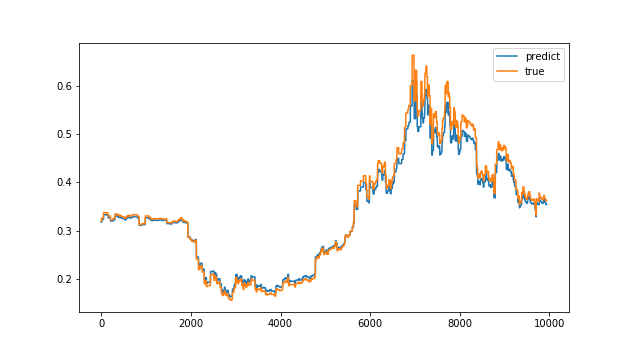

In [126]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [82]:
yhat_inverse_1 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [83]:
rmse_1 = sqrt(mean_squared_error(testY_inverse_1, yhat_inverse_1))
print('Test RMSE: %.3f' % rmse_1)

Test RMSE: 142.232


In [79]:
model_1 = model

#2

In [101]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [102]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [103]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics = ['accuracy'])
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)

Train on 23184 samples, validate on 9935 samples
Epoch 1/300
23184/23184 [==============================] - 1s 42us/step - loss: 0.0215 - accuracy: 4.3133e-05 - val_loss: 0.0497 - val_accuracy: 0.0000e+00
Epoch 2/300
23184/23184 [==============================] - 1s 24us/step - loss: 0.0276 - accuracy: 4.3133e-05 - val_loss: 0.0451 - val_accuracy: 0.0000e+00
Epoch 3/300
23184/23184 [==============================] - 1s 22us/step - loss: 0.0235 - accuracy: 4.3133e-05 - val_loss: 0.0410 - val_accuracy: 0.0000e+00
Epoch 4/300
23184/23184 [==============================] - 1s 22us/step - loss: 0.0227 - accuracy: 4.3133e-05 - val_loss: 0.0369 - val_accuracy: 0.0000e+00
Epoch 5/300
23184/23184 [==============================] - 1s 22us/step - loss: 0.0217 - accuracy: 4.3133e-05 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 6/300
23184/23184 [==============================] - 1s 22us/step - loss: 0.0171 - accuracy: 4.3133e-05 - val_loss: 0.0273 - val_accuracy: 0.0000e+00
Epoch 7/300
231

Epoch 53/300
23184/23184 [==============================] - 1s 28us/step - loss: 0.0026 - accuracy: 4.3133e-05 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 54/300
23184/23184 [==============================] - 1s 26us/step - loss: 0.0027 - accuracy: 4.3133e-05 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 55/300
23184/23184 [==============================] - 1s 23us/step - loss: 0.0019 - accuracy: 4.3133e-05 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 56/300
23184/23184 [==============================] - 1s 24us/step - loss: 0.0021 - accuracy: 4.3133e-05 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 57/300
23184/23184 [==============================] - 1s 25us/step - loss: 0.0025 - accuracy: 4.3133e-05 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 58/300
23184/23184 [==============================] - 1s 28us/step - loss: 0.0026 - accuracy: 4.3133e-05 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 59/300
23184/23184 [==============================] 

Epoch 157/300
23184/23184 [==============================] - 1s 25us/step - loss: 0.0024 - accuracy: 4.3133e-05 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 158/300
23184/23184 [==============================] - 1s 23us/step - loss: 0.0025 - accuracy: 4.3133e-05 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 159/300
23184/23184 [==============================] - 1s 24us/step - loss: 0.0028 - accuracy: 4.3133e-05 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 160/300
23184/23184 [==============================] - 1s 24us/step - loss: 0.0028 - accuracy: 4.3133e-05 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 161/300
23184/23184 [==============================] - 1s 24us/step - loss: 0.0024 - accuracy: 4.3133e-05 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 162/300
23184/23184 [==============================] - 1s 25us/step - loss: 0.0023 - accuracy: 4.3133e-05 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 163/300
23184/23184 [=========================

Epoch 209/300
23184/23184 [==============================] - 1s 27us/step - loss: 0.0044 - accuracy: 4.3133e-05 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 210/300
23184/23184 [==============================] - 1s 26us/step - loss: 0.0030 - accuracy: 4.3133e-05 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 211/300
23184/23184 [==============================] - 1s 25us/step - loss: 0.0026 - accuracy: 4.3133e-05 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 212/300
23184/23184 [==============================] - 1s 26us/step - loss: 0.0026 - accuracy: 4.3133e-05 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 213/300
23184/23184 [==============================] - 1s 25us/step - loss: 0.0025 - accuracy: 4.3133e-05 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 214/300
23184/23184 [==============================] - 1s 25us/step - loss: 0.0024 - accuracy: 4.3133e-05 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 215/300
23184/23184 [=========================

Epoch 261/300
23184/23184 [==============================] - 1s 27us/step - loss: 0.0019 - accuracy: 4.3133e-05 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 262/300
23184/23184 [==============================] - 1s 27us/step - loss: 0.0025 - accuracy: 4.3133e-05 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 263/300
23184/23184 [==============================] - 1s 26us/step - loss: 0.0026 - accuracy: 4.3133e-05 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 264/300
23184/23184 [==============================] - 1s 26us/step - loss: 0.0025 - accuracy: 4.3133e-05 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 265/300
23184/23184 [==============================] - 1s 28us/step - loss: 0.0024 - accuracy: 4.3133e-05 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 266/300
23184/23184 [==============================] - 1s 28us/step - loss: 0.0026 - accuracy: 4.3133e-05 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 267/300
23184/23184 [=========================

In [104]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [70]:
yhat_inverse_2 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [71]:
rmse_2 = sqrt(mean_squared_error(testY_inverse_2, yhat_inverse_2))
print('Test RMSE: %.3f' % rmse_2)

Test RMSE: 99.727


In [ ]:

model2 = model

3

In [105]:

look_back = 3
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [106]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [118]:
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)

Train on 23182 samples, validate on 9933 samples
Epoch 1/300
23182/23182 [==============================] - 1s 49us/step - loss: 0.0170 - val_loss: 0.0358
Epoch 2/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0198 - val_loss: 0.0272
Epoch 3/300
23182/23182 [==============================] - 1s 31us/step - loss: 0.0137 - val_loss: 0.0196
Epoch 4/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0094 - val_loss: 0.0149
Epoch 5/300
23182/23182 [==============================] - 1s 31us/step - loss: 0.0072 - val_loss: 0.0125
Epoch 6/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0074 - val_loss: 0.0107
Epoch 7/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0058 - val_loss: 0.0099
Epoch 8/300
23182/23182 [==============================] - 1s 34us/step - loss: 0.0060 - val_loss: 0.0109
Epoch 9/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0061 - val_loss: 0.01

23182/23182 [==============================] - 1s 32us/step - loss: 0.0029 - val_loss: 0.0041
Epoch 154/300
23182/23182 [==============================] - 1s 31us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 155/300
23182/23182 [==============================] - 1s 31us/step - loss: 0.0030 - val_loss: 0.0035
Epoch 156/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0023 - val_loss: 0.0032
Epoch 157/300
23182/23182 [==============================] - 1s 31us/step - loss: 0.0028 - val_loss: 0.0023
Epoch 158/300
23182/23182 [==============================] - 1s 31us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 159/300
23182/23182 [==============================] - 1s 31us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 160/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0027 - val_loss: 0.0033
Epoch 161/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0028 - val_loss: 0.0036
Epoch 162/300
23182/23182 [===============

Epoch 229/300
23182/23182 [==============================] - 1s 33us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 230/300
23182/23182 [==============================] - 1s 32us/step - loss: 0.0026 - val_loss: 0.0020
Epoch 231/300
23182/23182 [==============================] - 1s 34us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 232/300
23182/23182 [==============================] - 1s 30us/step - loss: 0.0033 - val_loss: 0.0035
Epoch 233/300
23182/23182 [==============================] - 1s 33us/step - loss: 0.0028 - val_loss: 0.0034
Epoch 234/300
23182/23182 [==============================] - 1s 27us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 235/300
23182/23182 [==============================] - 1s 28us/step - loss: 0.0022 - val_loss: 0.0038
Epoch 236/300
23182/23182 [==============================] - 1s 28us/step - loss: 0.0032 - val_loss: 0.0022
Epoch 237/300
23182/23182 [==============================] - 1s 27us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 238/300
23182/23182 [=

<IPython.core.display.Javascript object>


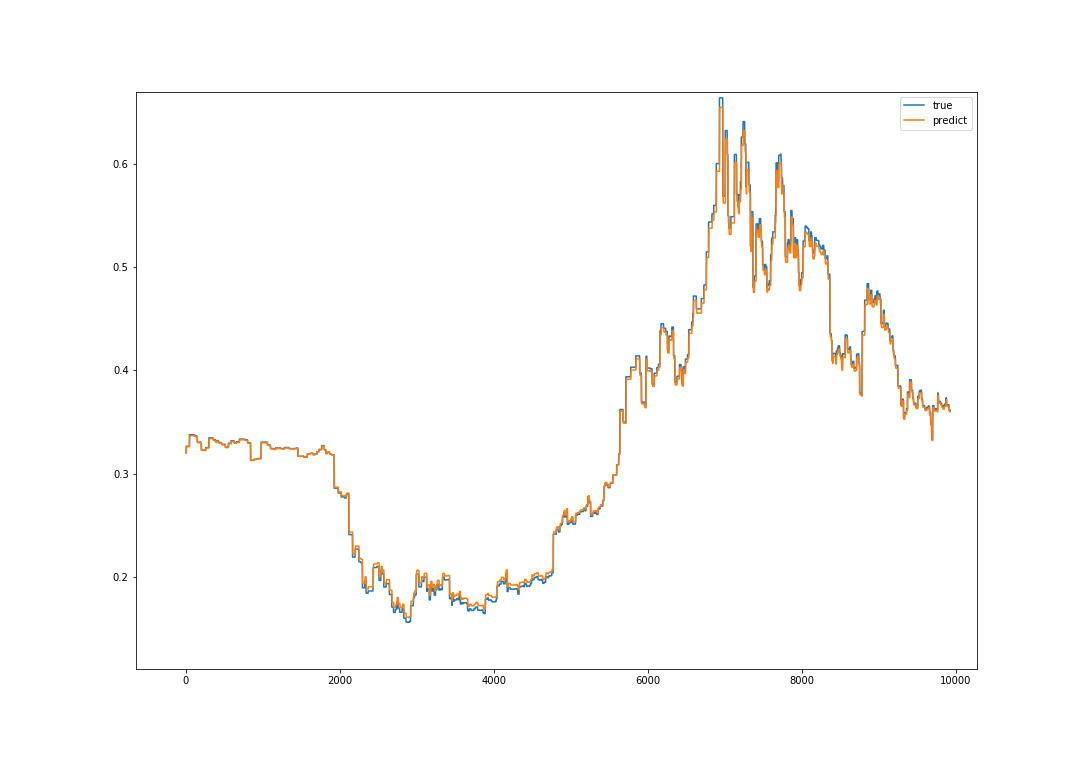

In [120]:
yhat = model.predict(testX)
pyplot.plot(testY, label='true')
pyplot.plot(yhat, label='predict')
pyplot.legend()
pyplot.show()

In [109]:
yhat_inverse_3 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_3 = scaler.inverse_transform(testY.reshape(-1, 1))

In [110]:
rmse_3 = sqrt(mean_squared_error(testY_inverse_3, yhat_inverse_3))
print('Test RMSE: %.3f' % rmse_3)

Test RMSE: 143.348
